# Linear Regression
* This algorithm is used to find the relationship betweem 2 continuous variables 
* The core idea is to obtain a line that best fits the data.The best fit line is the one for which total predicton error are as small as possible.
* we give x input to algorithm f(x) and output y.whenEver new input X is given new Y should be predicted

# Problem statement
* The task here is to find maximum tempture(dependent variable) during all days with respect to Minimum Temperature(independent variable)



In [1]:
#importing libraries 
#pandas for loading data and manipulation
#numpy for working with multidimensional arrays and matrices
#searborn and matplotlib is used for data visualization
#sklearn is machine learning library where all the methods related to ML algorithms can be imported

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#I used weather dataset of d day bombings during world war from medium website.

dataset = pd.read_csv('/Users/Manish/downloads/Weather.csv') #loading weather dataset into dataset dataframe

dataset


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#getting the MinTemp and MaxTemp into X and y from dataset and reshaping it. 
#reshape(-1,1):The new shape should be compatible with the original shape. -1 means unknown rows and numpy figures it out
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1) 

In [3]:
#Splitting the dataset into Train and Test with 80% data into training set and 20% data into testing set randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Calling constructor linearRegression
L_regression=LinearRegression()
#Trying to fit the data
L_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#This gives the predicted value
y_pred=L_regression.predict(X_test)


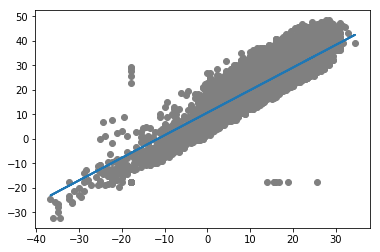

In [5]:
plt.scatter(X_test,y_test,color='gray')#Scatters points X test and Y test with color gray
plt.plot(X_test,y_pred,linewidth=2) #Plotting of line 
plt.show() 

* The model finds the linear relationship between Min and max temp.The model draws a linearly separable line between them which is the best fit

In [6]:
#These are methods for accuracy check of algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


* The mean squared error is 17 which means the model can have maximum of 17% error